In [1]:
!pip install statsbombpy

     |████████████████████████████████| 144 kB 8.5 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 207 kB 42.3 MB/s 
     |████████████████████████████████| 127 kB 43.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 6.3.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.3.2 which is incompa

In [2]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 3.0 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=e9691a1bec49c074f86b0df61802243fc2f7a8c616a6f3eb10d281b3c8f3e69c
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [3]:
from statsbombpy import sb

In [4]:
events = sb.events(match_id = 22912)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [5]:
events = events[['team','type','minute','location','pass_end_location','player','pass_recipient']]

In [6]:
events_1=events[events['team']=='Tottenham Hotspur']
events_1

,team,type,minute,location,pass_end_location,player,pass_recipient
0,Tottenham Hotspur,Starting XI,0,NaN,NaN,NaN,NaN
3,Tottenham Hotspur,Half Start,0,NaN,NaN,NaN,NaN
5,Tottenham Hotspur,Half Start,45,NaN,NaN,NaN,NaN
8,Tottenham Hotspur,Pass,0,"[33.5, 76.6]","[54.5, 65.9]",Kieran Trippier,Harry Kane
10,Tottenham Hotspur,Pass,0,"[37.3, 63.0]","[44.9, 60.7]",Moussa Sissoko,Harry Winks
...,...,...,...,...,...,...,...
3157,Tottenham Hotspur,Substitution,73,NaN,NaN,Moussa Sissoko,NaN
3158,Tottenham Hotspur,Substitution,81,NaN,NaN,Bamidele Alli,NaN
3160,Tottenham Hotspur,Tactical Shift,65,NaN,NaN,NaN,NaN
3162,Tottenham Hotspur,Tactical Shift,82,NaN,NaN,NaN,NaN


In [7]:
events_1[events_1['type']=='Substitution']

,team,type,minute,location,pass_end_location,player,pass_recipient
3156,Tottenham Hotspur,Substitution,65,NaN,NaN,Harry Winks,NaN
3157,Tottenham Hotspur,Substitution,73,NaN,NaN,Moussa Sissoko,NaN
3158,Tottenham Hotspur,Substitution,81,NaN,NaN,Bamidele Alli,NaN


In [8]:
pass_events=events_1[events_1['type']=='Pass'].reset_index()
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,8,Tottenham Hotspur,Pass,0,"[33.5, 76.6]","[54.5, 65.9]",Kieran Trippier,Harry Kane
1,10,Tottenham Hotspur,Pass,0,"[37.3, 63.0]","[44.9, 60.7]",Moussa Sissoko,Harry Winks
2,12,Tottenham Hotspur,Pass,0,"[33.7, 59.8]","[60.6, 60.5]",Toby Alderweireld,Harry Kane
3,17,Tottenham Hotspur,Pass,2,"[60.0, 40.0]","[43.4, 40.3]",Harry Kane,Bamidele Alli
4,18,Tottenham Hotspur,Pass,2,"[42.8, 40.3]","[106.2, 58.8]",Bamidele Alli,NaN
...,...,...,...,...,...,...,...,...
559,885,Tottenham Hotspur,Pass,94,"[91.1, 8.4]","[105.4, 37.6]",Eric Dier,Harry Kane
560,886,Tottenham Hotspur,Pass,94,"[65.8, 24.3]","[90.4, 35.2]",Jan Vertonghen,NaN
561,891,Tottenham Hotspur,Pass,94,"[7.0, 37.0]","[23.1, 55.0]",Hugo Lloris,Toby Alderweireld
562,892,Tottenham Hotspur,Pass,94,"[23.1, 55.0]","[81.3, 29.1]",Toby Alderweireld,Fernando Llorente Torres


In [9]:
pass_events=pass_events[pass_events['minute']<65]
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,8,Tottenham Hotspur,Pass,0,"[33.5, 76.6]","[54.5, 65.9]",Kieran Trippier,Harry Kane
1,10,Tottenham Hotspur,Pass,0,"[37.3, 63.0]","[44.9, 60.7]",Moussa Sissoko,Harry Winks
2,12,Tottenham Hotspur,Pass,0,"[33.7, 59.8]","[60.6, 60.5]",Toby Alderweireld,Harry Kane
3,17,Tottenham Hotspur,Pass,2,"[60.0, 40.0]","[43.4, 40.3]",Harry Kane,Bamidele Alli
4,18,Tottenham Hotspur,Pass,2,"[42.8, 40.3]","[106.2, 58.8]",Bamidele Alli,NaN
...,...,...,...,...,...,...,...,...
409,662,Tottenham Hotspur,Pass,63,"[49.4, 50.9]","[55.9, 37.3]",Toby Alderweireld,Harry Winks
410,663,Tottenham Hotspur,Pass,64,"[57.4, 50.3]","[36.9, 53.7]",Harry Winks,Toby Alderweireld
411,664,Tottenham Hotspur,Pass,64,"[34.7, 53.7]","[10.6, 44.4]",Toby Alderweireld,Hugo Lloris
412,665,Tottenham Hotspur,Pass,64,"[15.7, 36.1]","[23.4, 32.1]",Hugo Lloris,Jan Vertonghen


In [10]:
passes_between=pass_events.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
passes_between

,player,pass_recipient,type
0,Bamidele Alli,Christian Dannemann Eriksen,8
1,Bamidele Alli,Danny Rose,2
2,Bamidele Alli,Harry Kane,2
3,Bamidele Alli,Harry Winks,4
4,Bamidele Alli,Heung-Min Son,9
...,...,...,...
85,Toby Alderweireld,Heung-Min Son,1
86,Toby Alderweireld,Hugo Lloris,11
87,Toby Alderweireld,Jan Vertonghen,18
88,Toby Alderweireld,Kieran Trippier,11


In [11]:
#for all events for france
game=events_1[(events_1['player'].isin(passes_between['player'])) & (events_1['pass_recipient'].isin(passes_between['pass_recipient']))]
game['pass_recipient'].nunique()

11

In [12]:
game=game.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
game

,player,pass_recipient,type
0,Bamidele Alli,Christian Dannemann Eriksen,8
1,Bamidele Alli,Danny Rose,3
2,Bamidele Alli,Harry Kane,2
3,Bamidele Alli,Harry Winks,4
4,Bamidele Alli,Heung-Min Son,13
...,...,...,...
91,Toby Alderweireld,Heung-Min Son,3
92,Toby Alderweireld,Hugo Lloris,14
93,Toby Alderweireld,Jan Vertonghen,21
94,Toby Alderweireld,Kieran Trippier,11


In [13]:
game.rename(columns={'type':'pass_count'},inplace=True)

In [14]:
desc=game.describe()
threshold=desc.iloc[4]
thresh=threshold.item()
game=game[game['pass_count']>thresh].reset_index(drop=True)
game.describe()

,pass_count
count,63.000000
mean,6.952381
std,4.477285
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,25.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
scaler.fit(game['pass_count'].values.reshape(-1,1))
game['pass_count']=scaler.transform(game['pass_count'].values.reshape(-1,1))
game

,player,pass_recipient,pass_count
0,Bamidele Alli,Christian Dannemann Eriksen,2.272727
1,Bamidele Alli,Danny Rose,0.000000
2,Bamidele Alli,Harry Winks,0.454545
3,Bamidele Alli,Heung-Min Son,4.545455
4,Christian Dannemann Eriksen,Bamidele Alli,1.818182
...,...,...,...
58,Toby Alderweireld,Heung-Min Son,0.000000
59,Toby Alderweireld,Hugo Lloris,5.000000
60,Toby Alderweireld,Jan Vertonghen,8.181818
61,Toby Alderweireld,Kieran Trippier,3.636364


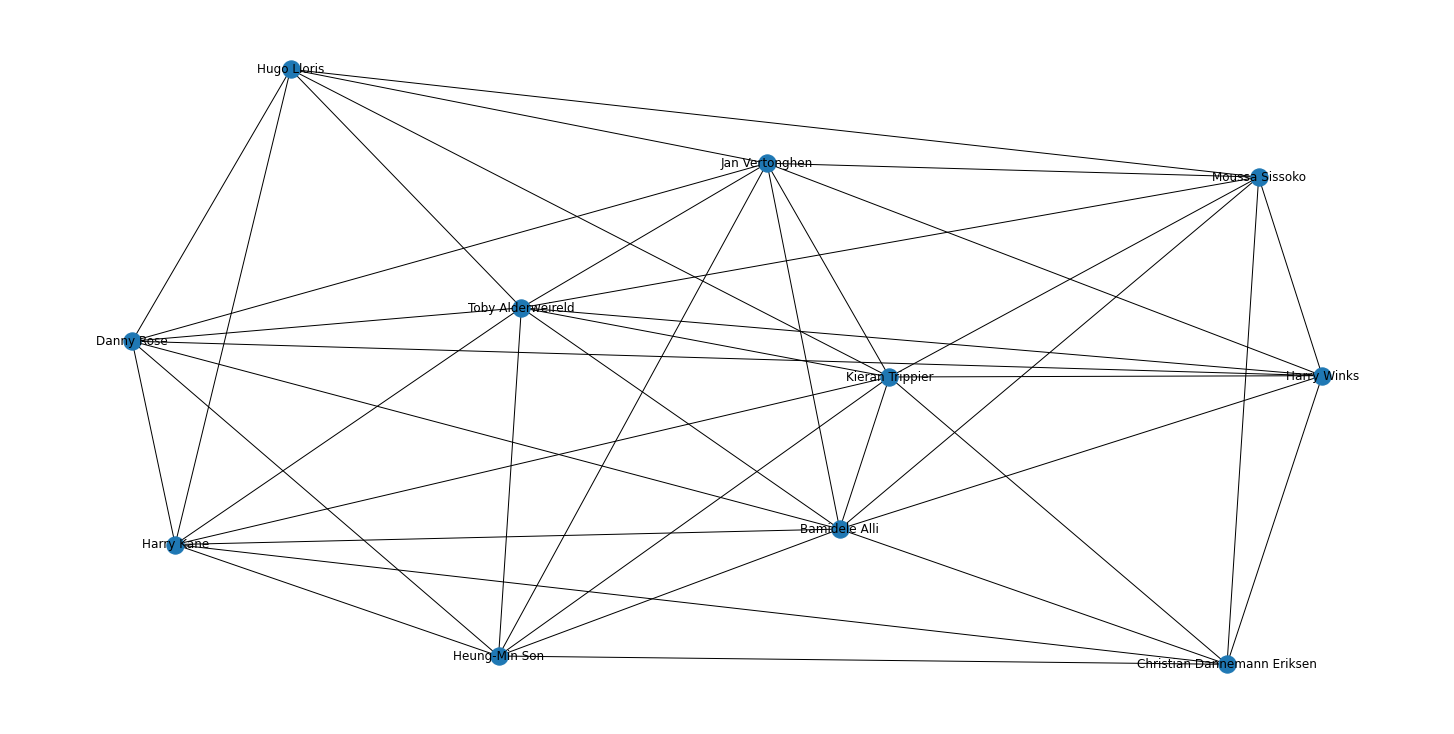

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
# Build your graph
G=nx.from_pandas_edgelist(game, 'player', 'pass_recipient',edge_attr='pass_count')
 
# Plot it
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)
plt.show()

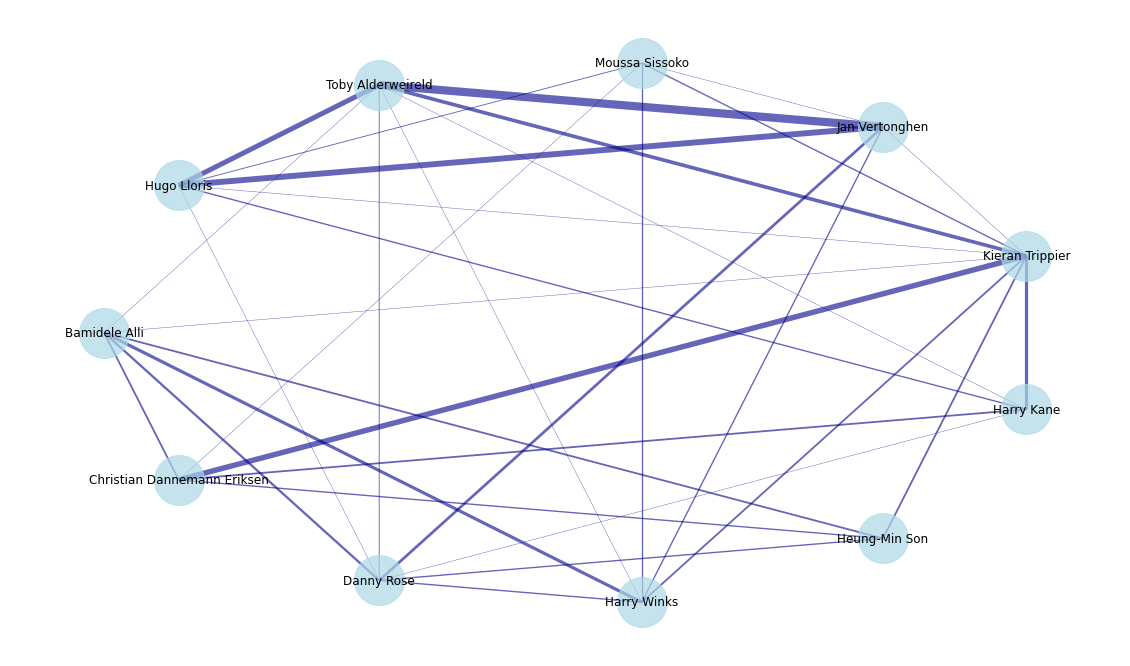

In [17]:
widths = nx.get_edge_attributes(G, 'pass_count')
nodelist = G.nodes()

plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=2500,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='darkblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

In [18]:
import pandas as pd
df3 = pd.DataFrame(events_1)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
0,Tottenham Hotspur,Starting XI,0,NaN,NaN,NaN,NaN
3,Tottenham Hotspur,Half Start,0,NaN,NaN,NaN,NaN
5,Tottenham Hotspur,Half Start,45,NaN,NaN,NaN,NaN
8,Tottenham Hotspur,Pass,0,"[33.5, 76.6]","[54.5, 65.9]",Kieran Trippier,Harry Kane
10,Tottenham Hotspur,Pass,0,"[37.3, 63.0]","[44.9, 60.7]",Moussa Sissoko,Harry Winks
...,...,...,...,...,...,...,...
3157,Tottenham Hotspur,Substitution,73,NaN,NaN,Moussa Sissoko,NaN
3158,Tottenham Hotspur,Substitution,81,NaN,NaN,Bamidele Alli,NaN
3160,Tottenham Hotspur,Tactical Shift,65,NaN,NaN,NaN,NaN
3162,Tottenham Hotspur,Tactical Shift,82,NaN,NaN,NaN,NaN


In [19]:
df3=df3[df3['player'].notna()]
df3=df3[df3['location'].notna()]
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
8,Tottenham Hotspur,Pass,0,"[33.5, 76.6]","[54.5, 65.9]",Kieran Trippier,Harry Kane
10,Tottenham Hotspur,Pass,0,"[37.3, 63.0]","[44.9, 60.7]",Moussa Sissoko,Harry Winks
12,Tottenham Hotspur,Pass,0,"[33.7, 59.8]","[60.6, 60.5]",Toby Alderweireld,Harry Kane
17,Tottenham Hotspur,Pass,2,"[60.0, 40.0]","[43.4, 40.3]",Harry Kane,Bamidele Alli
18,Tottenham Hotspur,Pass,2,"[42.8, 40.3]","[106.2, 58.8]",Bamidele Alli,NaN
...,...,...,...,...,...,...,...
3137,Tottenham Hotspur,Block,90,"[72.8, 31.1]",NaN,Eric Dier,NaN
3140,Tottenham Hotspur,Shield,18,"[8.3, 74.1]",NaN,Moussa Sissoko,NaN
3142,Tottenham Hotspur,Shield,62,"[3.1, 20.2]",NaN,Danny Rose,NaN
3143,Tottenham Hotspur,Shield,73,"[4.3, 65.8]",NaN,Toby Alderweireld,NaN


In [20]:
df3[['locationx','locationy']] = pd.DataFrame(df3.location.tolist(), index= df3.index)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient,locationx,locationy
8,Tottenham Hotspur,Pass,0,"[33.5, 76.6]","[54.5, 65.9]",Kieran Trippier,Harry Kane,33.5,76.6
10,Tottenham Hotspur,Pass,0,"[37.3, 63.0]","[44.9, 60.7]",Moussa Sissoko,Harry Winks,37.3,63.0
12,Tottenham Hotspur,Pass,0,"[33.7, 59.8]","[60.6, 60.5]",Toby Alderweireld,Harry Kane,33.7,59.8
17,Tottenham Hotspur,Pass,2,"[60.0, 40.0]","[43.4, 40.3]",Harry Kane,Bamidele Alli,60.0,40.0
18,Tottenham Hotspur,Pass,2,"[42.8, 40.3]","[106.2, 58.8]",Bamidele Alli,NaN,42.8,40.3
...,...,...,...,...,...,...,...,...,...
3137,Tottenham Hotspur,Block,90,"[72.8, 31.1]",NaN,Eric Dier,NaN,72.8,31.1
3140,Tottenham Hotspur,Shield,18,"[8.3, 74.1]",NaN,Moussa Sissoko,NaN,8.3,74.1
3142,Tottenham Hotspur,Shield,62,"[3.1, 20.2]",NaN,Danny Rose,NaN,3.1,20.2
3143,Tottenham Hotspur,Shield,73,"[4.3, 65.8]",NaN,Toby Alderweireld,NaN,4.3,65.8


In [21]:
df3=df3.groupby(by=['player'],as_index=False).agg({'locationx':'mean','locationy':'mean'})
df3

,player,locationx,locationy
0,Bamidele Alli,74.809333,30.348000
1,Christian Dannemann Eriksen,70.485897,46.683974
2,Danny Rose,58.162092,8.516340
3,Eric Dier,56.416667,42.250000
4,Fernando Llorente Torres,87.426316,39.184211
5,Harry Kane,82.358824,35.576471
6,Harry Winks,56.543836,39.002055
7,Heung-Min Son,77.327465,34.935211
8,Hugo Lloris,8.988485,39.298788
9,Jan Vertonghen,33.925764,23.475109


In [22]:
df3=df3[df3['player'].isin(game['player'].unique())].reset_index(drop=True)

In [23]:
df3.loc[(df3['locationy']<50.0),'location_y']=(100-df3['locationy'])
df3.loc[(df3['locationy']>50.0),'location_y']=(100-df3['locationy'])
df3

,player,locationx,locationy,location_y
0,Bamidele Alli,74.809333,30.348000,69.652000
1,Christian Dannemann Eriksen,70.485897,46.683974,53.316026
2,Danny Rose,58.162092,8.516340,91.483660
3,Harry Kane,82.358824,35.576471,64.423529
4,Harry Winks,56.543836,39.002055,60.997945
5,Heung-Min Son,77.327465,34.935211,65.064789
6,Hugo Lloris,8.988485,39.298788,60.701212
7,Jan Vertonghen,33.925764,23.475109,76.524891
8,Kieran Trippier,59.873481,71.679006,28.320994
9,Moussa Sissoko,53.634426,47.567213,52.432787


In [24]:
df3.set_index('player',inplace=True)

In [25]:

!pip install highlight_text

In [26]:
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


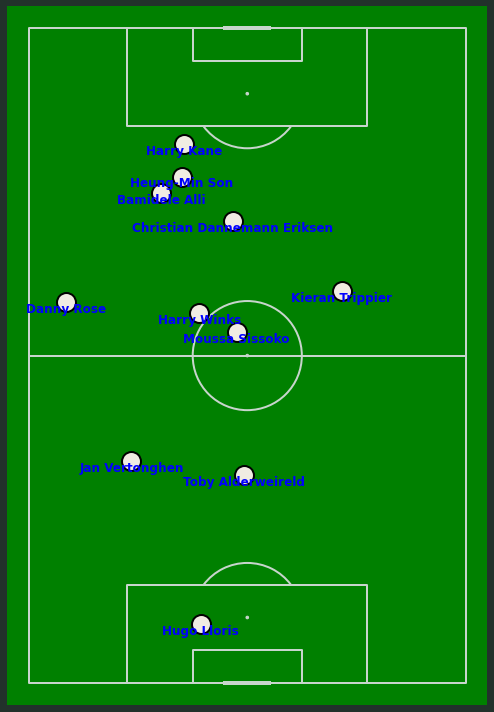

In [27]:
#plotting the average location for the players
#Make arrows less transparent if they have a higher count, totally optional of course
from mplsoccer import Pitch, VerticalPitch
import numpy as np
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(df3), 1))


#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='green', line_color='#c7d5cc', figsize=(20, 1),
              constrained_layout=True, tight_layout=False,half=False)
fig, ax = pitch.draw(figsize=(20,10))



''' 
pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
                         1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
                         headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

ax.add_patch(arrow)
 '''
#plot nodes
pass_nodes = pitch.scatter(1.2*df3.locationx, 80-0.8*df3.location_y,s=360,
                           color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
# pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 5 Times", (-4, 40), color='w',
#                fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono")


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in df3.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.locationx, 80-0.8*row.location_y), c='blue', va='top', ha='center', size=12, fontweight='bold', fontfamily="Calibri",ax=ax)

#Set the background color
fig.patch.set_facecolor('#22312b')


In [28]:
nx.write_gml(G, "LiverpoolvSpurs(Tot).gml")